<a href="https://colab.research.google.com/github/ThienBao224/Python/blob/main/CALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Phân tích dữ liệu Cali

**1. Input (dữ liệu đầu vào):**

Bảng dữ liệu cali.csv với các cột:

longitude, latitude: vị trí địa lý.

housing_median_age: tuổi trung vị của nhà.

total_rooms, total_bedrooms: tổng số phòng, phòng ngủ.

population: dân số khu vực.

households: số hộ gia đình.

median_income: thu nhập trung vị.

ocean_proximity: vị trí so với biển (phân loại: NEAR BAY, INLAND, …).

median_house_value: giá nhà trung vị (biến mục tiêu).

Đọc file

In [ ]:
import pandas as pd

# Đọc file CSV từ Drive
df = pd.read_csv("/content/drive/MyDrive/6_Nguyễn Hoàng Thiên Bảo_Tuần4/Buổi 2 _ Thứ 7/cali.csv")

# Hiển thị 5 dòng đầu
df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Tải dữ liệu California housing
housing = fetch_california_housing()

# Chuyển sang DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)

# Thêm cột target (giá nhà trung bình)
df["MedHouseVal"] = housing.target

# Hiển thị 5 dòng đầu
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Data preprocessing**

Kiểm tra xem dữ liệu có bị null hay không

In [ ]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Dimension of the dataset
print(df.shape)

(20640, 10)


Truy cập theo slice index: Theo cách này chúng ta chỉ cần truyền vào index của dòng và cột và sử dụng hàm df.iloc[rows_slice, columns_slice] để trích xuất ra các dòng và cột tương ứng. Cách lấy slice cho rows và columns hoàn toàn tương tự như truy cập slice index trong list.

In [ ]:
# Lựa chọn 5 dòng đầu và 5 cột đầu của df
df.iloc[:5, :5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41,880,129.0
1,-122.22,37.86,21,7099,1106.0
2,-122.24,37.85,52,1467,190.0
3,-122.25,37.85,52,1274,235.0
4,-122.25,37.85,52,1627,280.0


In [ ]:
# Lựa chọn 5 dòng từ 5:10 và 2 cột từ 2:4
df.iloc[5:10, 2:4]

,housing_median_age,total_rooms
5,52,919
6,52,2535
7,52,3104
8,42,2555
9,52,3549


Truy cập các dòng theo row index của dataframe thông qua câu lệnh df.loc[].

In [ ]:
# Truy cập các dòng có index là 10:15
df.loc[10:15]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10,-122.26,37.85,52,2202,434.0,910,402,3.2031,281500,NEAR BAY
11,-122.26,37.85,52,3503,752.0,1504,734,3.2705,241800,NEAR BAY
12,-122.26,37.85,52,2491,474.0,1098,468,3.0750,213500,NEAR BAY
13,-122.26,37.84,52,696,191.0,345,174,2.6736,191300,NEAR BAY
14,-122.26,37.85,52,2643,626.0,1212,620,1.9167,159200,NEAR BAY
15,-122.26,37.85,50,1120,283.0,697,264,2.1250,140000,NEAR BAY


Truy cập theo column names: Đây là cách được sử dụng phổ biến vì nó tường minh hơn. Theo cách này chúng ta sẽ truy cập các trường của dataframe bằng cách khai báo list column_names của chúng.

Ví dụ bên dưới chúng ta cần lấy ra các trường ['latitude', 'population', 'households'] từ bảng df.

In [ ]:
df[['latitude', 'population', 'households']]

,latitude,population,households
0,37.88,322,126
1,37.86,2401,1138
2,37.85,496,177
3,37.85,558,219
4,37.85,565,259
...,...,...,...
20635,39.48,845,330
20636,39.49,356,114
20637,39.43,1007,433
20638,39.43,741,349


Kết hợp cả hai cách: Chúng ta có thể truy cập dataframe bằng cách kết hợp cả hai cách theo hướng sử dụng column names đối với cột và slice index đối với dòng

In [ ]:
# Lấy ra các dòng từ 10:15 của các trường
df[['latitude', 'population', 'households']].iloc[10:15]

,latitude,population,households
10,37.85,910,402
11,37.85,1504,734
12,37.85,1098,468
13,37.84,345,174
14,37.85,1212,620


**Lọc dataframe**

Lọc những dòng có median_income > 10

In [ ]:
df_income = df[df["median_income"] > 10]
display(df_income)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
131,-122.19,37.84,18,1617,210.0,533,194,11.6017,392600,NEAR BAY
409,-122.28,37.90,52,2003,250.0,658,244,10.0825,397000,NEAR BAY
510,-122.22,37.82,39,2492,310.0,808,315,11.8603,500001,NEAR BAY
511,-122.22,37.82,42,2991,335.0,1018,335,13.4990,500001,NEAR BAY
512,-122.23,37.82,52,3242,366.0,1001,352,12.2138,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20376,-118.86,34.16,16,1509,216.0,578,235,10.2614,410800,<1H OCEAN
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20389,-118.90,34.19,26,1582,196.0,573,182,10.0595,500001,<1H OCEAN
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN


Lọc những dòng có median_house_value > 500000

In [ ]:
df_expensive = df[df["median_house_value"] > 500000]
display(df_expensive)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
89,-122.27,37.80,52,249,78.0,396,85,1.2434,500001,NEAR BAY
459,-122.25,37.87,52,609,236.0,1349,250,1.1696,500001,NEAR BAY
493,-122.24,37.86,52,1668,225.0,517,214,7.8521,500001,NEAR BAY
494,-122.24,37.85,52,3726,474.0,1366,496,9.3959,500001,NEAR BAY
509,-122.23,37.83,52,2990,379.0,947,361,7.8772,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35,1503,263.0,576,216,5.1457,500001,<1H OCEAN
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
20436,-118.69,34.21,10,3663,409.0,1179,371,12.5420,500001,<1H OCEAN


 Lọc những dòng gần biển

In [ ]:
df_ocean = df[df["ocean_proximity"] == "NEAR OCEAN"]
display(df_ocean)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1850,-124.17,41.80,16,2739,480.0,1259,436,3.7557,109400,NEAR OCEAN
1851,-124.30,41.80,19,2672,552.0,1298,478,1.9797,85800,NEAR OCEAN
1852,-124.23,41.75,11,3159,616.0,1343,479,2.4805,73200,NEAR OCEAN
1853,-124.21,41.77,17,3461,722.0,1947,647,2.5795,68400,NEAR OCEAN
1854,-124.19,41.78,15,3140,714.0,1645,640,1.6654,74600,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16,1316,194.0,450,173,10.1597,500001,NEAR OCEAN
20381,-118.83,34.14,16,1956,312.0,671,319,6.4001,321800,NEAR OCEAN
20423,-119.00,34.08,17,1822,438.0,578,291,5.4346,428600,NEAR OCEAN
20424,-118.75,34.18,4,16704,2704.0,6187,2207,6.6122,357600,NEAR OCEAN


Lọc theo nhiều điều kiện

In [ ]:
df_multi = df[(df["median_income"] > 8) & (df["median_house_value"] > 400000)]
display(df_multi)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
155,-122.23,37.81,52,2315,292.0,861,258,8.8793,410300,NEAR BAY
407,-122.27,37.89,52,3046,373.0,975,365,8.8342,430500,NEAR BAY
494,-122.24,37.85,52,3726,474.0,1366,496,9.3959,500001,NEAR BAY
510,-122.22,37.82,39,2492,310.0,808,315,11.8603,500001,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20389,-118.90,34.19,26,1582,196.0,573,182,10.0595,500001,<1H OCEAN
20426,-118.69,34.18,11,1177,138.0,415,119,10.0472,500001,<1H OCEAN
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN
20428,-118.83,34.23,6,8803,1114.0,3385,1010,8.7288,425800,<1H OCEAN


Ta dùng hàm df.select_dtypes() để lọc các cột theo định dạng dữ liệu. Những định dạng chính bao gồm integer, float, object, boolean.

In [ ]:
# lọc các trường có định dạng dữ liệu là float.
df.select_dtypes('float').head()

,longitude,latitude,total_bedrooms,median_income
0,-122.23,37.88,129.0,8.3252
1,-122.22,37.86,1106.0,8.3014
2,-122.24,37.85,190.0,7.2574
3,-122.25,37.85,235.0,5.6431
4,-122.25,37.85,280.0,3.8462


Min, max, mean, meadian, sum

In [ ]:
vals = [
    df["median_house_value"].min(),
    df["median_house_value"].max(),
    df["median_house_value"].mean(),
    df["median_house_value"].median(),
    df["median_house_value"].sum()
]

# Hiển thị 1 hàng, giống như print ra
display(pd.DataFrame([vals], columns=["Min", "Max", "Mean", "Median", "Sum"]))

,Min,Max,Mean,Median,Sum
0,14999,500001,206855.816909,179700.0,4269504061


In [ ]:
#Sort data
df.sort_values('median_house_value', ascending = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5253,-118.49,34.11,27,6603,879.0,2336,868,13.2935,500001,<1H OCEAN
5254,-118.48,34.07,29,4767,777.0,1500,638,10.7937,500001,<1H OCEAN
5255,-118.48,34.07,40,3351,484.0,1564,523,8.5153,500001,<1H OCEAN
5256,-118.48,34.07,37,4042,549.0,1318,542,12.8665,500001,<1H OCEAN
5257,-118.49,34.06,42,2861,360.0,829,310,15.0001,500001,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39,493,168.0,259,138,2.3667,17500,<1H OCEAN
9188,-117.86,34.24,52,803,267.0,628,225,4.1932,14999,INLAND
19802,-123.17,40.31,36,98,28.0,18,8,0.5360,14999,INLAND
2799,-117.02,36.40,19,619,239.0,490,164,2.1000,14999,INLAND


In [ ]:
df.sort_values(['median_house_value', 'total_bedrooms'], ascending = False).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8985,-118.44,33.98,21,18132,5419.0,7431,4930,5.3359,500001,<1H OCEAN
9027,-118.88,34.02,19,15990,2611.0,5175,2173,7.7848,500001,NEAR OCEAN
8804,-118.42,33.75,22,17591,2604.0,6897,2492,8.2831,500001,NEAR OCEAN
5492,-118.46,33.97,18,9430,2473.0,3408,2003,6.1726,500001,<1H OCEAN
20427,-118.80,34.19,4,15572,2222.0,5495,2152,8.6499,500001,<1H OCEAN


**Thống kê theo nhóm**

In [ ]:
df.groupby(['ocean_proximity']).sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-1085793.19,315745.43,267495,24012547,4937435.0,13889374,4730118,38651.5100,2193410032
INLAND,-784370.82,240630.21,159005,17803933,3468095.0,9112744,3127759,21022.1353,817600123
ISLAND,-591.77,166.79,212,7873,2102.0,3340,1383,13.7221,1902200
NEAR BAY,-279976.99,86564.42,86402,5710320,1167195.0,2817427,1118931,9555.9061,593596194
NEAR OCEAN,-317185.93,92334.77,78005,6867477,1415482.0,3598955,1332308,10647.3760,662995512


In [ ]:
df.groupby(['ocean_proximity']).mean()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
ocean_proximity,,,,,,,,,
<1H OCEAN,-118.847766,34.560577,29.279225,2628.343586,546.539185,1520.290499,517.744965,4.230682,240084.285464
INLAND,-119.732990,36.731829,24.271867,2717.742787,533.881619,1391.046252,477.447565,3.208996,124805.392001
ISLAND,-118.354000,33.358000,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,-122.260694,37.801057,37.730131,2493.589520,514.182819,1230.317467,488.616157,4.172885,259212.311790
NEAR OCEAN,-119.332555,34.738439,29.347254,2583.700903,538.615677,1354.008653,501.244545,4.005785,249433.977427


**Data Visualization**

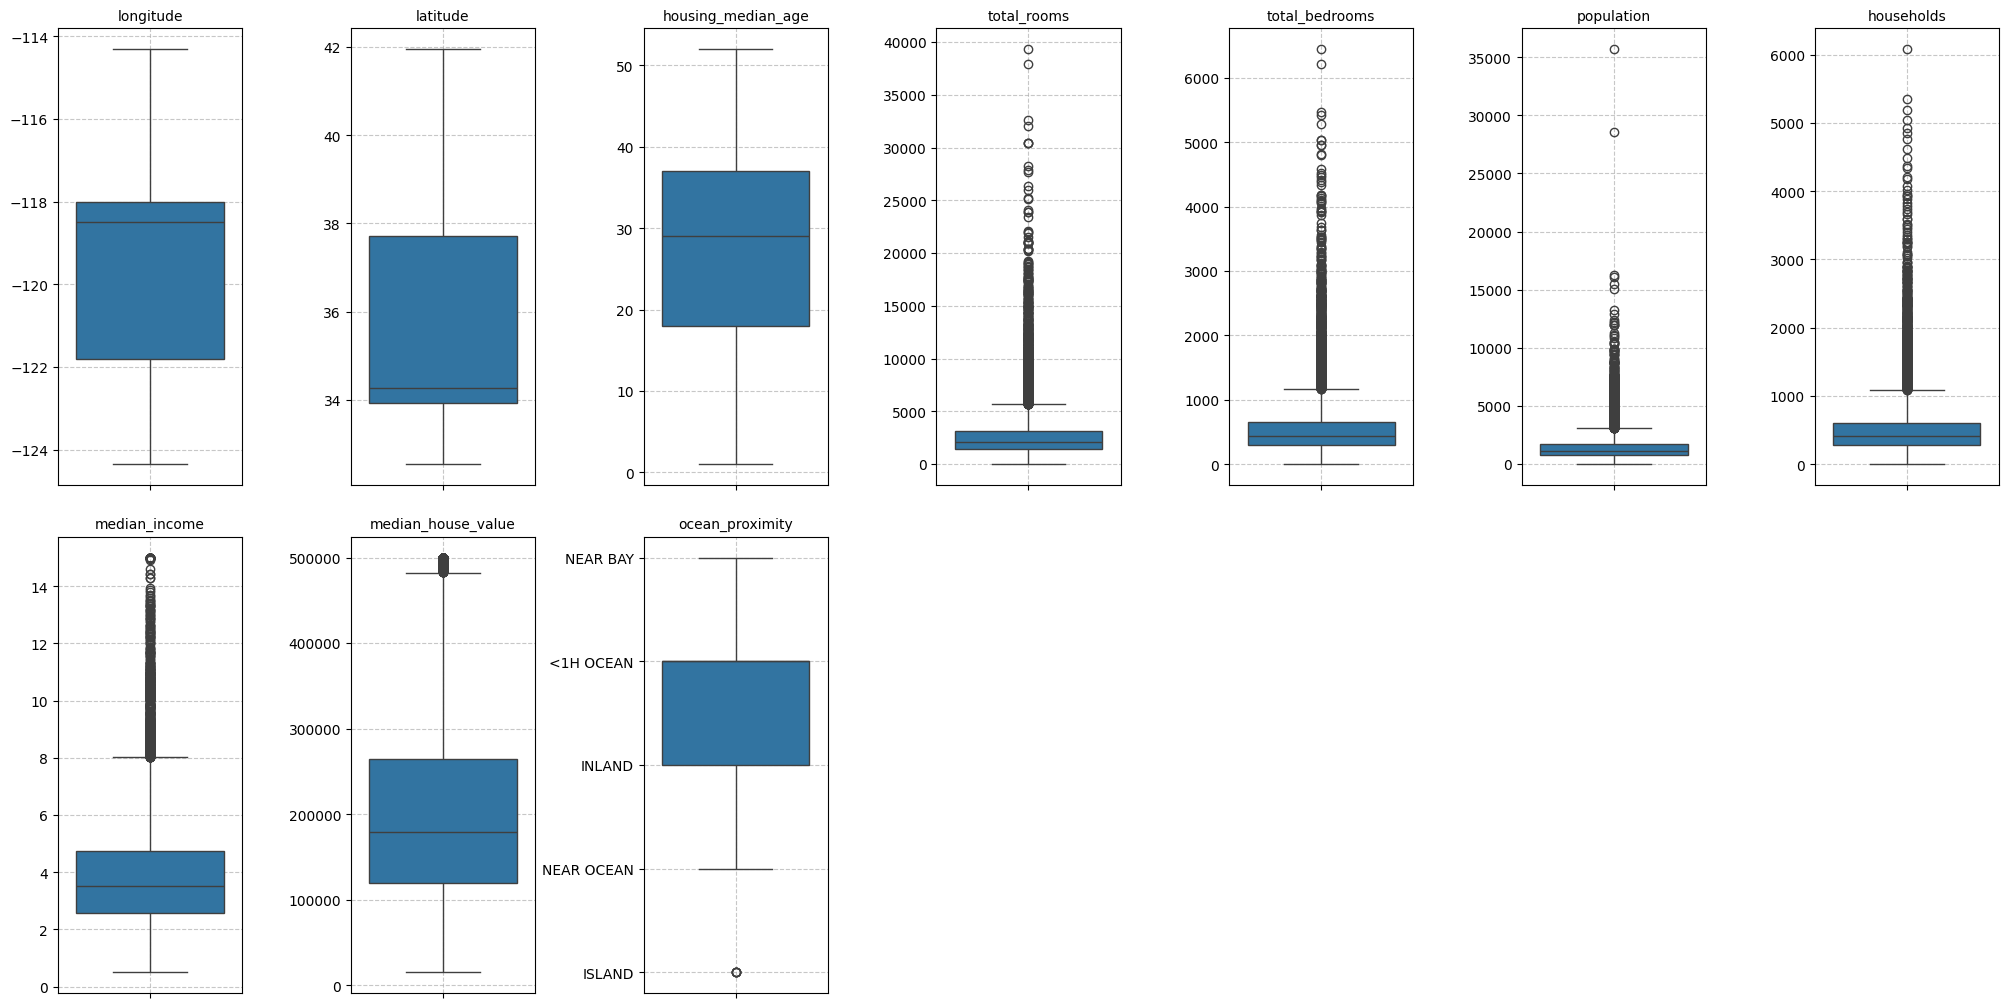

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_nonempty = df.dropna(axis=1, how='all')

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()

for index, (k, v) in enumerate(df_nonempty.items()):
    sns.boxplot(y=k, data=df_nonempty, ax=axs[index])
    axs[index].set_title(k, fontsize=10)
    axs[index].set_ylabel('')
    axs[index].grid(True, linestyle='--', alpha=0.7)

for j in range(index+1, len(axs)):
    axs[j].axis('off')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

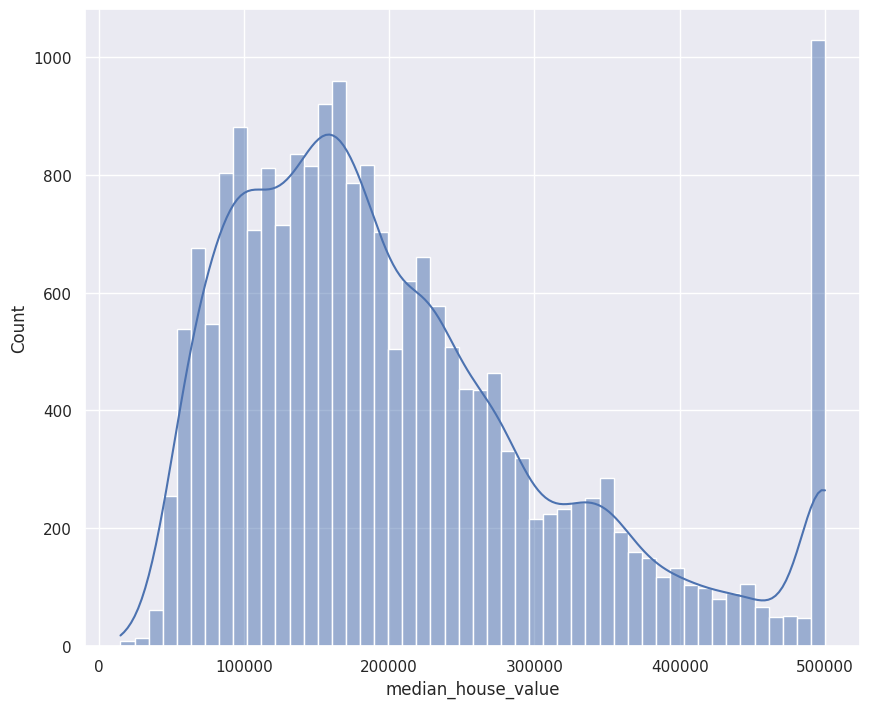

In [ ]:
# set the size of the figure
sns.set(rc={'figure.figsize':(10,8.27)})

# plot a histogram showing the distribution of the target values
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.show()

**Correlation matrix**

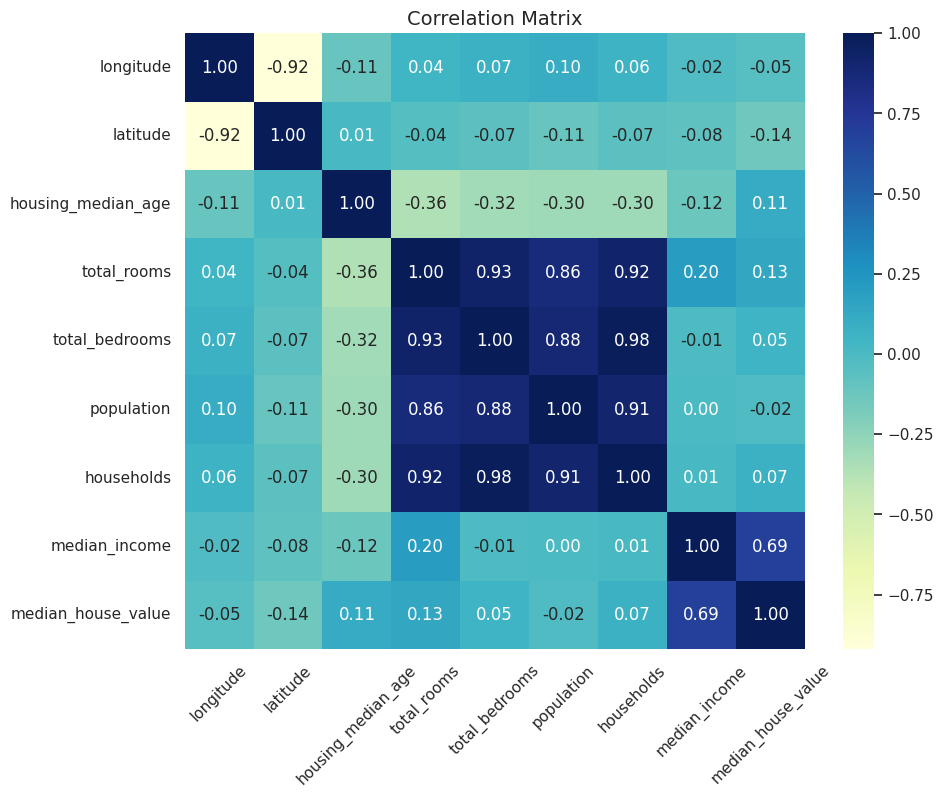

In [ ]:
# Lấy các cột số
numeric_df = df.select_dtypes(include=["float64", "int64"])

# Ma trận tương quan
correlation_matrix = numeric_df.corr().round(2)

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.xticks(rotation=45)
plt.show()

**Observations**

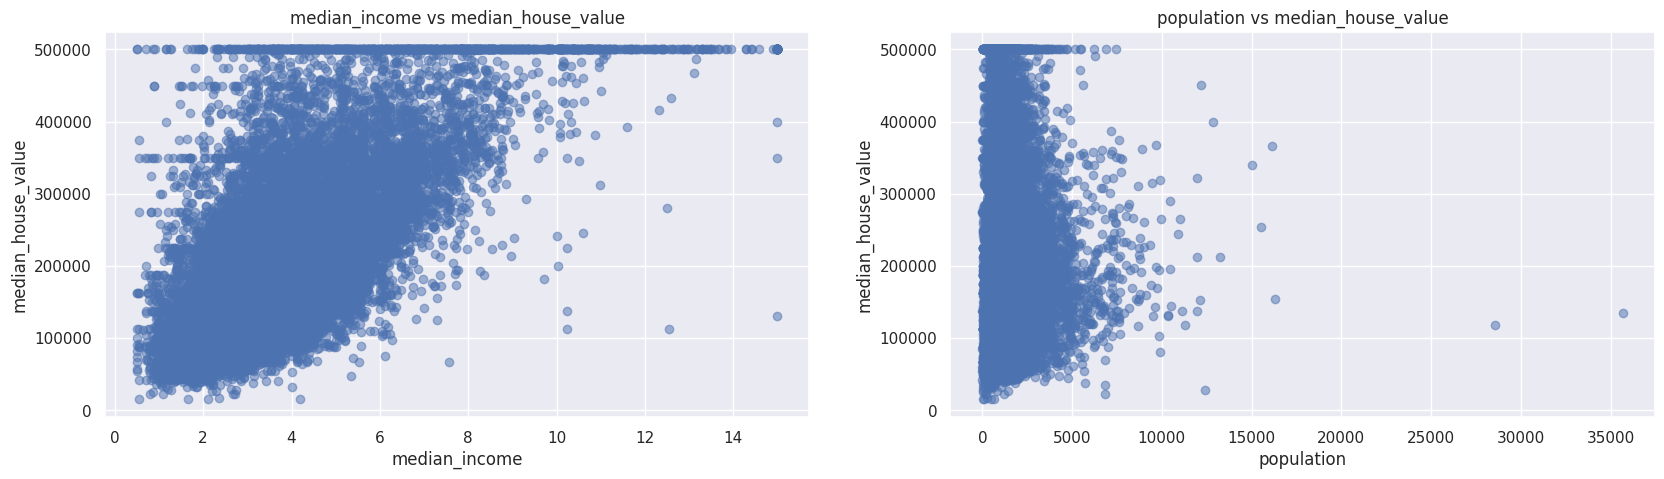

In [ ]:
plt.figure(figsize=(20, 5))

# Chọn 2 cột để so sánh với median_house_value
features = ['median_income', 'population']
target = df['median_house_value']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o', alpha=0.5)
    plt.title(f"{col} vs median_house_value")
    plt.xlabel(col)
    plt.ylabel("median_house_value")

plt.show()

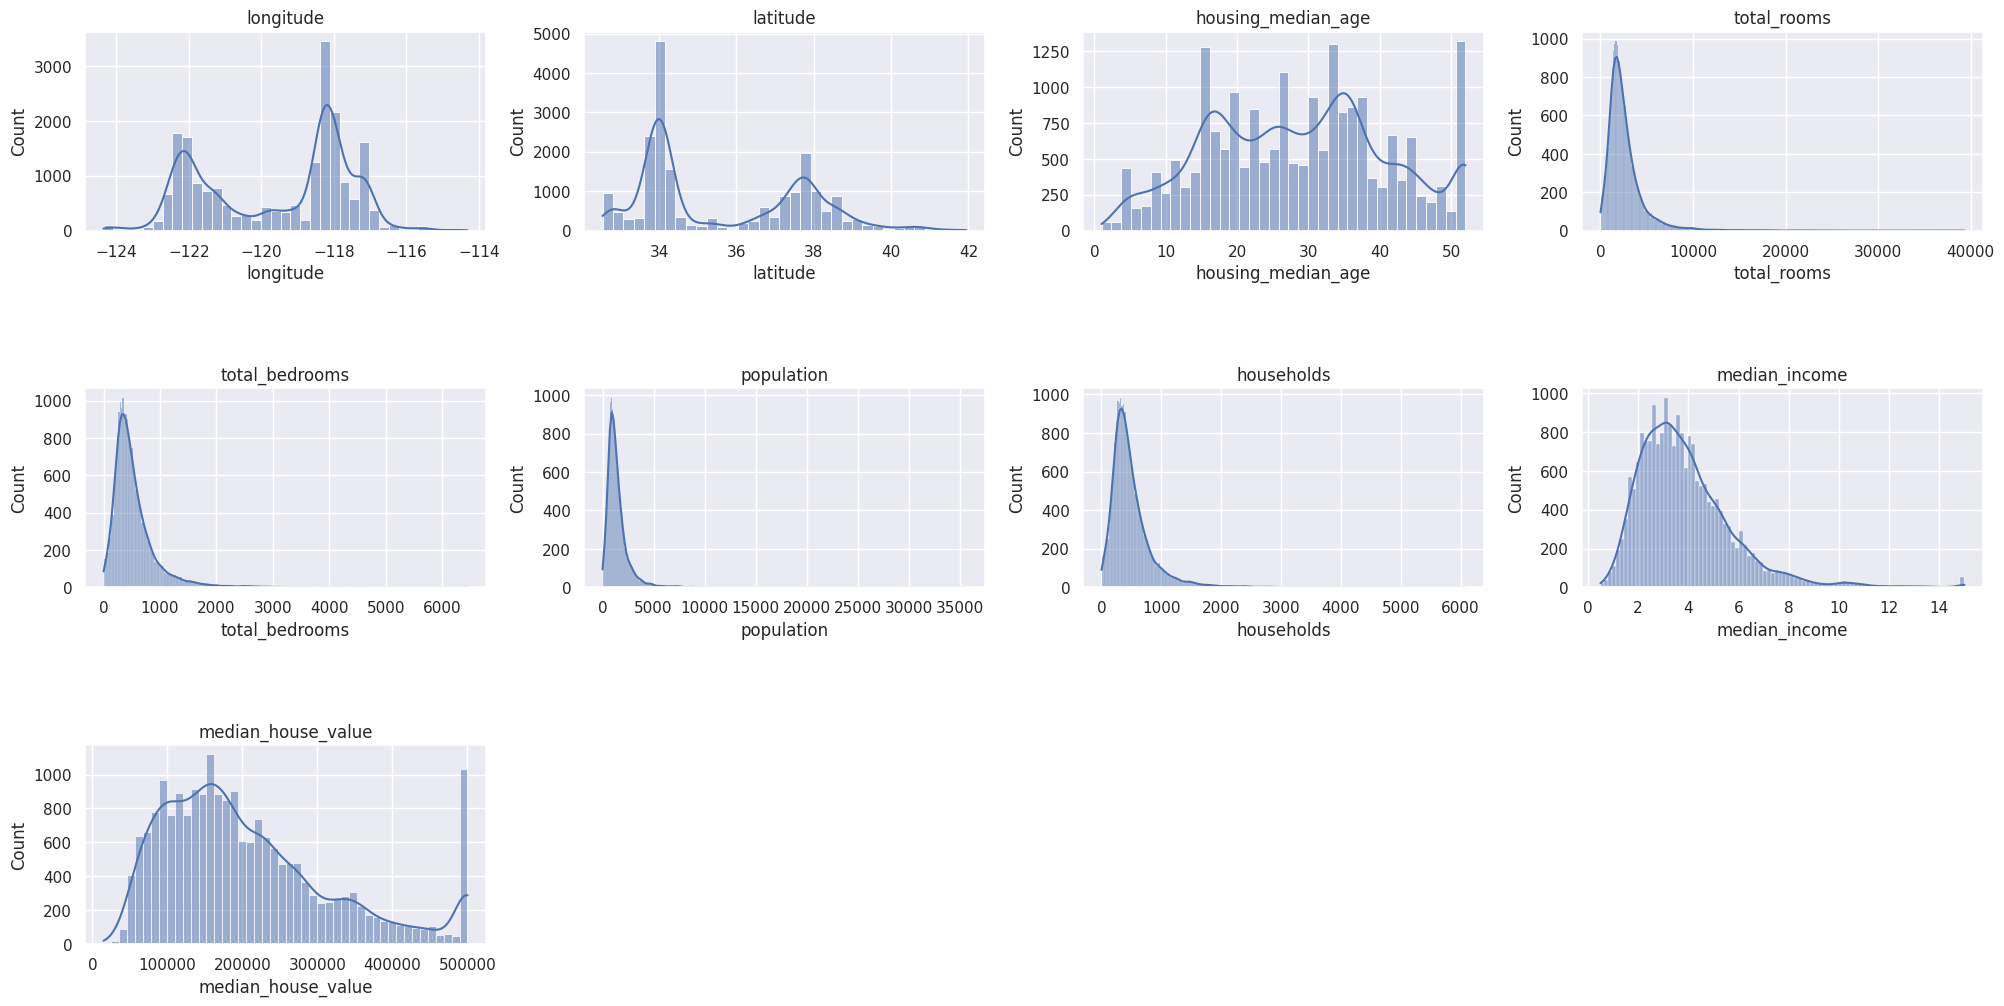

In [ ]:
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
axs = axs.flatten()

index = 0
for col in numeric_cols:
    sns.histplot(df[col], kde=True, ax=axs[index])   # thay distplot bằng histplot
    axs[index].set_title(col)
    index += 1

# Xóa subplot thừa
for j in range(index, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()